In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/sudheerpadmannagari/anaconda3/sentiment_tweets3.csv')
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [3]:
# RENAMING COLUMNS

df = df.rename(columns = {"message to examine":"Text", "label (depression result)" :"Category" })

In [4]:
# KEEPING ONLY THE 2 NECESSARY COLUMNS

df = df[["Text", "Category"]]

In [5]:
# REVIEW DATA AFTER CHANGES

df.head(5)

,Text,Category
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [6]:
df.shape

(10314, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10314 non-null  object
 1   Category  10314 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 161.3+ KB


In [8]:
df.isnull().sum()

Text        0
Category    0
dtype: int64

In [9]:
# REMOVING DUPLICATE VALUES

df = df.drop_duplicates()

In [10]:
# CHECKING ALL CATEGORIES

df["Category"].unique()

array([0, 1])

In [11]:
# RENAMING COLUMNS TO MAKE UNDERSTANDING OF EXPLORATION RESULTS EASIER

df['Category'] = df['Category'].replace(0,'Not Depressed')
df['Category'] = df['Category'].replace(1,'Depressed')

In [12]:
# CHECKING NO. OF CATEGORIES

df["Category"].value_counts()

Not Depressed    7996
Depressed        2287
Name: Category, dtype: int64

Text(0.5, 1.0, 'COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT')

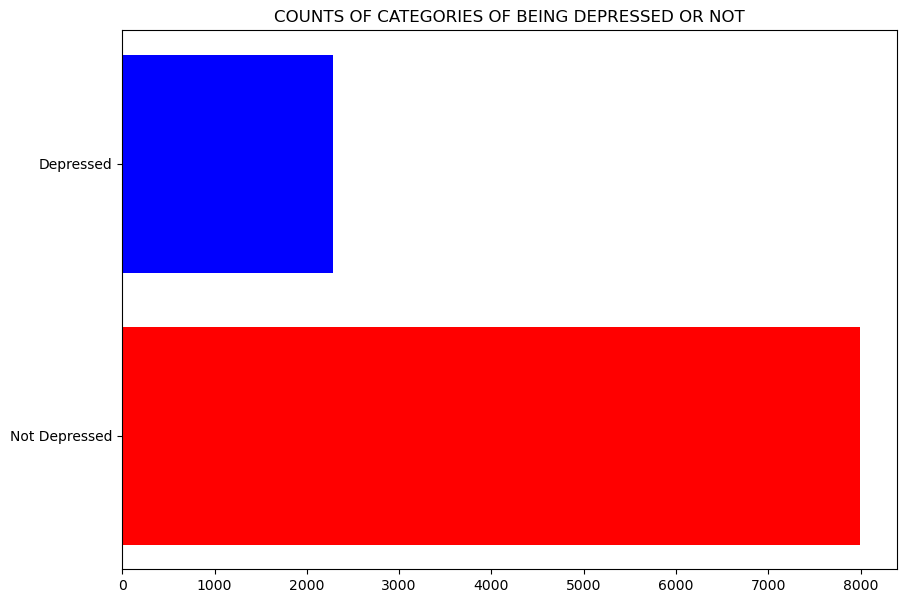

In [13]:
# CHECKING COUNTS OF CATEGORIES

fig = plt.figure(figsize =(10, 7))
plt.barh(df["Category"].unique(), df["Category"].value_counts(), 
         color =['red', 'blue'])
plt.title("COUNTS OF CATEGORIES OF BEING DEPRESSED OR NOT")

In [14]:
# RENAMING COLUMNS BACK TO INITIAL ENCODED NUMBERS AS EXPLORATION IS OVER AND WE SHALL NEED ENCODED NUMBERS FOR FURTHER ANALYSIS

df['Category'] = df['Category'].replace('Not Depressed', 0)
df['Category'] = df['Category'].replace('Depressed', 1)

In [15]:
# INSTALLING TEXTACY LIBRARY FOR PREPROCESSING

%pip install textacy

Note: you may need to restart the kernel to use updated packages.


In [16]:
# IMPORT OTHER TEXT PREPROCESSING LIBRARIES

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from textacy import preprocessing

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sudheerpadmannagari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sudheerpadmannagari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sudheerpadmannagari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [17]:
# SHUFFLING OUR DATASET SINCE IT IS IS UNSHUFFLED AND FIRST 8000 ROWS BELONGED TO A CERTAIN CATEGORY

df = df.sample(frac=1)

In [18]:
# CONVERTING TEXT TO LOWER CASE

df["Text"] = df["Text"].str.lower()

In [19]:
# REMOVING THE STOPWORDS

stop = stopwords.words('english')

df["Text"] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [20]:
# REMOVING PUNCTUATION, EXTRA WHITESPACES AND HASHTAGS

preprocess = preprocessing.make_pipeline(
    preprocessing.remove.punctuation,
    preprocessing.normalize.whitespace,
    preprocessing.replace.hashtags,
)

df["Text"] = df["Text"].apply(preprocess)

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sudheerpadmannagari/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
# STEMMING THE WORDS

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
df['Text'] = df['Text'].apply(lambda x: stemmer.stem(x))

In [23]:
# REVIEW THE DATA AFTER TEXT PREPROCESSING

df.head()

,Text,Category
8390,stick cut creases cut wrists depress,1
653,larasexypanties hey you need chat sometime soo...,0
9322,do help individuals define goals plan action g...,1
5330,kimvallee feel way toronto so bright amp refre...,0
6533,danrua get 100 followers day using www tweeter...,0


In [24]:
# IMPORTING LIBRARY TO IMPLEMENT TF-IDF ALGORITHM

from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
# CREATING CORPUS OF OUR WORDS

corpus = df['Text'].tolist()

In [26]:
# PRINTING NO. OF WORDS OF OUR CORPUS

print("Total no. of words in our corpus are:", len(corpus),'\n')

Total no. of words in our corpus are: 10283 



In [27]:
# FITTING VECTORIZER TO OUR DATA

vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)

TfidfVectorizer()

In [28]:
# TRANSFORMING OUR DATA

Text_tf = vectorizer.transform(df['Text']).toarray()

In [29]:
# GETTING TOP 5 WORDS WITH HIGHEST TF-IDF SCORES

feature_array = np.array(vectorizer.get_feature_names_out())
tfidf_sorting = np.argsort(Text_tf).flatten()[::-1]

n = 5
top_n = feature_array[tfidf_sorting][:n]
print("The 5 most important words are", top_n, '\n')

The 5 most important words are ['basement' 'jules685' 'crash' 'summ' 'come'] 



In [30]:
# GETTING WORDS WITH THE LEAST TF-IDF SCORES

bottom_n = feature_array[tfidf_sorting][-n:]
print(" The 5 least important words having lowest tf-idf scores are", bottom_n)
print('\n')

 The 5 least important words having lowest tf-idf scores are ['part' 'partayyyi' 'parti' 'participants' '00']




In [31]:
# REVIEW ONE OF THE VECTORIZED SENTENCE

Text_tf[1]

array([0., 0., 0., ..., 0., 0., 0.])

In [32]:
# RECHEKING LENGTH OF OUR VECTORIZED ARRAY

print("Length of our vectorized array is:",len(Text_tf), "\n")

Length of our vectorized array is: 10283 




 Our TF-IDF Vector in 2-D Looks like: 



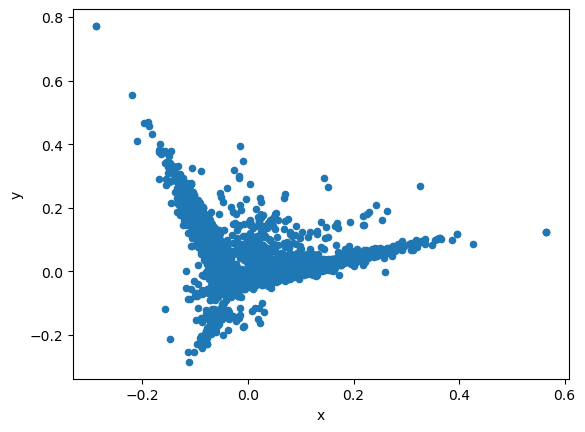

In [33]:
# VISUALIZING OUR TF-IDF VECTOR IN 2-D USING PCA

from sklearn.decomposition import PCA
%matplotlib inline

pca = PCA(n_components=2)

df2d = pd.DataFrame(pca.fit_transform(Text_tf), columns=list('xy'))

print('\n', "Our TF-IDF Vector in 2-D Looks like:",'\n')
df2d.plot(kind='scatter', x='x', y='y')
plt.show()

In [34]:
# SPLITTING OUR VECTORIZED ARRAY TO TRAINING AND TESTING USING THE 80-20 RULE

x_train = Text_tf[:8000]
x_test = Text_tf[8000:]

In [35]:
# SPLITTING OUR DEPENDENT VARIABLE INTO TRAINING AND TESTING

y_train = df["Category"].iloc[:8000]
y_test = df["Category"].iloc[8000:]

## FITTING OUR MACHINE LEARNING MODELS

In [36]:
# IMPORTING TIME LIBRARY TO PRINT THE TIME TAKEN TO TRAIN AND PREDICT WITH THE MODEL

from time import time

## 1) FITTING A MULTIPLE LOGISTIC REGRESSION MODEL

In [37]:
# IMPORTING LIBRARY TO IMPLEMENT LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

In [38]:
# FITTING THE MODEL

lr_t0 = time()

lgr = LogisticRegression()
lgr.fit(x_train, y_train)

print("Training Time of the Logistic Regression Model:", round(time()-lr_t0, 3), "seconds",'\n')

Training Time of the Logistic Regression Model: 2.651 seconds 



In [39]:
# PREDICTING WITH THE MODEL

lr_t1 = time()

y_pred_lgr = lgr.predict(x_test)

print("Time taken to make predictions for the Logistic Regression Model:", round(time()-lr_t1, 3), "seconds",'\n')

Time taken to make predictions for the Logistic Regression Model: 0.177 seconds 



## 2) FITTING A DECISION TREE CLASSIFIER

In [40]:
# IMPORTING LIBRARY TO IMPLEMENT DECISION TREE CLASSIFIER

from sklearn.tree import DecisionTreeClassifier

In [41]:
# FITTING THE MODEL

dt_t0=time()

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

print("Training Time of the Decision Tree Model:", round(time()-dt_t0, 3), "seconds", '\n')

Training Time of the Decision Tree Model: 17.134 seconds 



In [42]:
# PRINTING MAX DEPTH OF OUR DECISION TREE MODEL

dt_depth = dt.tree_.max_depth
print("Max depth of our Decision Tree Model is:", dt_depth)
print('\n')

Max depth of our Decision Tree Model is: 624




In [43]:
# PRINTING NO. OF NODES OF OUR DECISION TREE MODEL

dt_nodes = dt.tree_.node_count
print("No. of nodes of our Decision Tree Model is:", dt_nodes)
print('\n')

No. of nodes of our Decision Tree Model is: 1249




In [44]:
# PREDICTING WITH THE MODEL

dt_t1=time()

y_pred_dt = dt.predict(x_test)

print("Time taken to make predictions for the Decision Tree Model:", round(time()-dt_t1, 3), "seconds",'\n')

Time taken to make predictions for the Decision Tree Model: 0.074 seconds 



## 3) FITTING A RANDOM FORESTS CLASSIFIER

In [45]:
# IMPORTING LIBRARY TO IMPLEMENT RANDOM FORESTS CLASSIFIER

from sklearn.ensemble import RandomForestClassifier

In [46]:
# FITTING THE MODEL

rf_t0=time()

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

print("Training Time of the Random Forest Model:", round(time()-rf_t0, 3), "seconds", '\n')

Training Time of the Random Forest Model: 47.18 seconds 



In [47]:
# PRINTING MAX DEPTH OF OUR RANDOM FOREST MODEL

rf_depth = rf.estimators_[0].tree_.max_depth
print("Max depth of our Decision Tree Model is:", rf_depth)
print('\n')

Max depth of our Decision Tree Model is: 849




In [48]:
# PRINTING NUMBER OF ESTIMATORS (DECISION TREES) USED IN BUILDING OUR RNADOM FOREST MODEL

n_nodes = rf.estimators_
print("No. of estimators (decision trees) used for building our Random Forest model are:",len(n_nodes))
print("\n")

No. of estimators (decision trees) used for building our Random Forest model are: 100




In [49]:
# PREDICTING WITH THE MODEL

rf_t1 = time()

y_pred_rf = rf.predict(x_test)

print("Time taken to make predictions for the Random Forest Model:", round(time()-rf_t1, 3), "seconds", '\n')

Time taken to make predictions for the Random Forest Model: 0.327 seconds 



## EVALUATING OUR MODELS

In [50]:
# IMPORTING LIBRARIES TO EVALAUTE MODELS

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [51]:
# CHECKING THE ACCURACY SCORES OF MODELS

print("THE ACCURACY SCORES OF OUR MODELS ARE AS FOLLOWS:", "\n")
print("Accuracy Score of our Logistic Regression model is: ", accuracy_score(y_pred_lgr, y_test), "\n")
print("Accuracy Score of our Decision Tree Classifier is: ", accuracy_score(y_pred_dt, y_test), "\n")
print("Accuracy Score of our Random Forest Classifier is: ", accuracy_score(y_pred_rf, y_test), "\n")

THE ACCURACY SCORES OF OUR MODELS ARE AS FOLLOWS: 

Accuracy Score of our Logistic Regression model is:  0.9763469119579501 

Accuracy Score of our Decision Tree Classifier is:  0.9964958388085852 

Accuracy Score of our Random Forest Classifier is:  0.9964958388085852 



<Figure size 2000x2000 with 0 Axes>

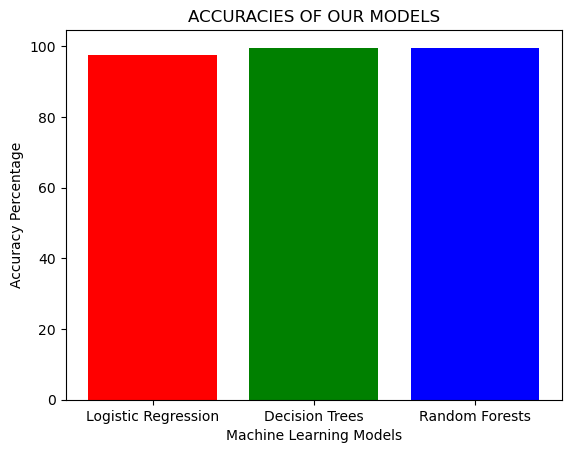

<Figure size 2000x2000 with 0 Axes>

In [52]:
# COMPARING THE ACCURACIES OF MODELS USING A BAR PLOT

plt.bar(x = ["Logistic Regression","Decision Trees", "Random Forests"], height = [(accuracy_score(y_pred_lgr, y_test))*100, (accuracy_score(y_pred_dt, y_test))*100,(accuracy_score(y_pred_rf, y_test))*100 ], color = ["red", "green", "blue"])
plt.title("ACCURACIES OF OUR MODELS")
plt.ylabel("Accuracy Percentage")
plt.xlabel("Machine Learning Models")

plt.figure(figsize=(20,20))

In [53]:
# CONFUSION MATRIX FOR OUR LOGISTIC REGRESSION MODEL

confusion_lgr = confusion_matrix(y_pred_lgr, y_test)

print("Confusion Matrix of our Logistic Regression Model is:")
print(confusion_lgr, "\n")
print("The no. of true positives are:", confusion_lgr[0,0], "\n")
print("The no. of true negatives are:", confusion_lgr[1,1], "\n")

Confusion Matrix of our Logistic Regression Model is:
[[1750   54]
 [   0  479]] 

The no. of true positives are: 1750 

The no. of true negatives are: 479 



In [54]:
# CONFUSION MATRIX FOR OUR DECISION TREES CLASSIFIER MODEL

confusion_dt = confusion_matrix(y_pred_dt, y_test)

print("Confusion Matrix of our Logistic Regression Model is:")
print(confusion_dt, "\n")
print("The no. of true positives are:", confusion_dt[0,0], "\n")
print("The no. of true negatives are:", confusion_dt[1,1], "\n")

Confusion Matrix of our Logistic Regression Model is:
[[1750    8]
 [   0  525]] 

The no. of true positives are: 1750 

The no. of true negatives are: 525 



In [55]:
# CONFUSION MATRIX FOR OUR RANDOM FORESTS CLASSIFIER MODEL

confusion_rf = confusion_matrix(y_pred_rf, y_test)

print("Confusion Matrix of our Logistic Regression Model is:")
print(confusion_rf, "\n")
print("The no. of true positives are:", confusion_rf[0,0], "\n")
print("The no. of true negatives are:", confusion_rf[1,1], "\n")

Confusion Matrix of our Logistic Regression Model is:
[[1749    7]
 [   1  526]] 

The no. of true positives are: 1749 

The no. of true negatives are: 526 



In [56]:
# CHECKING THE F1 SCORES OF MODELS

print("THE F1 SCORES OF OUR MODELS:", "\n")
print("F1 Score of our Logistic Regression model is: ", f1_score(y_pred_lgr, y_test), "\n")
print("F1 Score of our Decision Tree Classifier is: ", f1_score(y_pred_dt, y_test), "\n")
print("F1 Score of our Random Forest Classifier is: ", f1_score(y_pred_rf, y_test), "\n")

THE F1 SCORES OF OUR MODELS: 

F1 Score of our Logistic Regression model is:  0.9466403162055336 

F1 Score of our Decision Tree Classifier is:  0.9924385633270322 

F1 Score of our Random Forest Classifier is:  0.9924528301886792 



In [57]:
# CHECKING THE RECALL SCORE

print("THE RECALL SCORES OF OUR MODELS", "\n")
print("Recall Score of our Logistic Regression model is: ", recall_score(y_pred_lgr, y_test), "\n")
print("Recall Score of our Decision Tree Classifier is: ", recall_score(y_pred_dt, y_test), "\n")
print("Recall Score of our Random Forest Classifier is: ", recall_score(y_pred_rf, y_test), "\n")

THE RECALL SCORES OF OUR MODELS 

Recall Score of our Logistic Regression model is:  1.0 

Recall Score of our Decision Tree Classifier is:  1.0 

Recall Score of our Random Forest Classifier is:  0.9981024667931688 

